In [1]:
# Імпорт бібліотек	
import seaborn as sns	
import pandas as pd	
import matplotlib.pyplot as plt	

In [2]:
# Завантажуємо data.csv		
df = pd.read_csv('survey_results_public.csv', low_memory=False)
schema = pd.read_csv('survey_results_schema.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49191 entries, 0 to 49190
Columns: 172 entries, ResponseId to JobSat
dtypes: float64(52), int64(1), object(119)
memory usage: 64.6+ MB


In [4]:
df.shape

(49191, 172)

In [5]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
EdLevel                 object
Employment              object
                        ...   
AIAgentExtWrite         object
AIHuman                 object
AIOpen                  object
ConvertedCompYearly    float64
JobSat                 float64
Length: 172, dtype: object

Завдання 1. Підрахунок загальної кількості респондентів

In [6]:
# Кількість респондентів
respondents_count = df['ResponseId'].nunique()
print(f"Загальна кількість респондентів: {respondents_count}")

Загальна кількість респондентів: 49191


Завдання 2. Аналіз повноти відповідей респондентів

In [7]:
# Очищаємо список питань 
questions_clean = (schema['qname'].astype(str).str.strip())         

# Прибираємо порожні або некоректні значення
questions_clean = questions_clean[(questions_clean != "") & (questions_clean != "nan")]

# Список питань, які  є в df
question_cols = [q for q in questions_clean if q in df.columns]
df_questions = df[question_cols]

# Підрахунок респондентів, які відповіли на всі питання
num_complete = df_questions.dropna().shape[0]

print(f"Кількість питань у schema: {questions_clean.nunique()}")
print(f"Кількість запитань, що є в df: {len(question_cols)}")
print(f"Кількість респондентів, які відповіли на всі питання: {num_complete}")


Кількість питань у schema: 139
Кількість запитань, що є в df: 126
Кількість респондентів, які відповіли на всі питання: 0


Завдання 3. Статистичний аналіз досвіду респондентів

In [8]:
[col for col in df.columns if 'work' in col.lower()]

['WorkExp',
 'RemoteWork',
 'ToolCountWork',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'DevEnvsHaveWorkedWith',
 'DevEnvsWantToWorkWith',
 'SOTagsHaveWorkedWith',
 'SOTagsWantToWorkWith',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'CommPlatformHaveWorkedWith',
 'CommPlatformWantToWorkWith',
 'AIModelsHaveWorkedWith',
 'AIModelsWantToWorkWith']

In [9]:
df['WorkExp'].dtype

dtype('float64')

In [10]:
df['WorkExp'].head()

0     8.0
1     2.0
2    10.0
3     4.0
4    21.0
Name: WorkExp, dtype: float64

In [11]:
print(df['WorkExp'].min(), df['WorkExp'].max())	

1.0 100.0


In [12]:
workexp = df['WorkExp'].dropna()
mean_value = workexp.mean()
median_value = workexp.median()
mode_value = workexp.mode().iloc[0] 
result = pd.DataFrame({
    'Mean': [mean_value],
    'Median': [median_value],
    'Mode': [mode_value]
})

print("Статистика досвіду роботи серед респондентів:")
print(result)

Статистика досвіду роботи серед респондентів:
        Mean  Median  Mode
0  13.367403    10.0  10.0


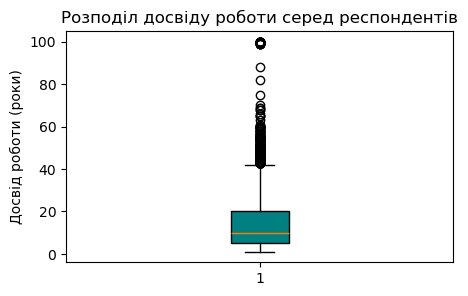

In [13]:
# Boxplot
plt.figure(figsize=(5, 3))

plt.boxplot(workexp, vert=True, patch_artist=True, boxprops=dict(facecolor='teal'))

# Підписи
plt.ylabel("Досвід роботи (роки)")
plt.title("Розподіл досвіду роботи серед респондентів")
plt.show()

Більшість респондентів мають досвід 0–20 років, медіана близько 10 років.
Є кілька дуже старших респондентів з дуже великим досвідом (викиди)

Завдання 4. Аналіз віддаленої роботи


In [14]:
[col for col in df.columns if 'remote' in col.lower()]

['RemoteWork']

In [15]:
df['RemoteWork'].head(10)

0                                               Remote
1    Hybrid (some in-person, leans heavy to flexibi...
2                                                  NaN
3                                               Remote
4                                                  NaN
5                                                  NaN
6                                                  NaN
7                                               Remote
8                                               Remote
9                                               Remote
Name: RemoteWork, dtype: object

In [16]:
df['RemoteWork'].unique()

array(['Remote', 'Hybrid (some in-person, leans heavy to flexibility)',
       nan, 'In-person', 'Hybrid (some remote, leans heavy to in-person)',
       'Your choice (very flexible, you can come in when you want or just as needed)'],
      dtype=object)

In [17]:
# Фільтр( тільки ряди з Remote)
remote_workers = df[df['RemoteWork'] == 'Remote']

# Підраховуєм кількість
num_remote = len(remote_workers)

print(f"Кількість віддалених працівників: {num_remote}")

Кількість віддалених працівників: 10931


Завдання 5. Визначення популярності Python

In [18]:
python_cols = [
    col for col in df.columns
    if df[col].astype(str).str.contains('Python', na=False).any()
]
python_cols

['TechEndorse_13_TEXT',
 'TechOppose_15_TEXT',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'LanguagesHaveEntry',
 'LanguagesWantEntry',
 'DatabaseHaveEntry',
 'PlatformHaveEntry',
 'PlatformWantEntry',
 'WebframeHaveEntry',
 'WebframeWantEntry',
 'DevEnvHaveEntry',
 'DevEnvWantEntry',
 'SOTagsHaveEntry',
 'SOTagsWant Entry',
 'AIExplain',
 'AIAgentKnowWrite',
 'AIOpen']

In [21]:
df['LanguageHaveWorkedWith'].head(10)

0                     Bash/Shell (all shells);Dart;SQL
1                                                 Java
2                  Dart;HTML/CSS;JavaScript;TypeScript
3                                      Java;Kotlin;SQL
4    C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...
5                                           Java;Scala
6                                JavaScript;TypeScript
7    Bash/Shell (all shells);HTML/CSS;JavaScript;Py...
8                                    Java;Python;Scala
9                                                  NaN
Name: LanguageHaveWorkedWith, dtype: object

In [22]:
# Беремо колонку з мовами
df_lang = df['LanguageHaveWorkedWith'] 
# Підраховуємо тих, хто знає Python 
python_users = df_lang.dropna().str.contains("Python", case=False).sum()
# Загальна кількість респондентів у всьому опитуванні
total_resp = df.shape[0]
# Відсоток
percent_python = (python_users / total_resp) * 100
print(f"Відсоток респондентів, які програмують на Python: {percent_python:.2f}%")


Відсоток респондентів, які програмують на Python: 37.54%


Завдання 6. Аналіз шляхів навчання програмуванню

In [23]:
[col for col in df.columns if 'learn' in col.lower() or 'educ' in col.lower()]

['LearnCodeChoose', 'LearnCode', 'LearnCodeAI', 'AILearnHow']

In [22]:
df['LearnCode'].head(10)

0    Online Courses or Certification (includes all ...
1    Online Courses or Certification (includes all ...
2    Online Courses or Certification (includes all ...
3    Other online resources (e.g. standard search, ...
4                                                  NaN
5    Online Courses or Certification (includes all ...
6    Videos (not associated with specific online co...
7    Books / Physical media;Technical documentation...
8    Online Courses or Certification (includes all ...
9    Other online resources (e.g. standard search, ...
Name: LearnCode, dtype: object

In [23]:
df['LearnCode'].unique()

array(['Online Courses or Certification (includes all media types);Other online resources (e.g. standard search, forum, online community)',
       'Online Courses or Certification (includes all media types);Other online resources (e.g. standard search, forum, online community);Books / Physical media;Videos (not associated with specific online course or certification);Stack Overflow or Stack Exchange',
       'Online Courses or Certification (includes all media types);Videos (not associated with specific online course or certification);Technical documentation (is generated for/by the tool or system)',
       ...,
       'Other online resources (e.g. standard search, forum, online community);Books / Physical media;Videos (not associated with specific online course or certification);Stack Overflow or Stack Exchange;Technical documentation (is generated for/by the tool or system);Colleague or on-the-job training;Blogs or podcasts;Coding Bootcamp;Games or coding challenges;School (i.e., Uni

In [24]:
df['LearnCode'] = df['LearnCode'].fillna('').astype(str)

# Перевірка, чи є "online" у відповіді
df['has_online'] = df['LearnCode'].str.lower().str.contains('online', na=False)

# Підрахунок
count_online = df['has_online'].sum()

print(f"Кількість респондентів: {count_online}")


Кількість респондентів: 28352


Завдання 7. Географічний аналіз компенсації Python-розробників

In [25]:
lang_col = 'LanguageHaveWorkedWith'  
comp_col = 'ConvertedCompYearly'


df_clean = df.dropna(subset=[lang_col]).copy()

#  Фільтруємо Python-розробників
df_clean = df_clean[df_clean[lang_col].str.contains("Python", case=False)]

#  Перетворюємо компенсацію в числовий формат
df_clean[comp_col] = pd.to_numeric(df_clean[comp_col], errors='coerce')

#  Видаляємо ряди без компенсації
df_clean = df_clean.dropna(subset=[comp_col])

#  Групування по країнах(середнє та медіана, сортуєм по середній)
result = (
    df_clean.groupby("Country")[comp_col]
    .agg(avg_comp="mean", median_comp="median")
    .reset_index()
    .sort_values(by="avg_comp", ascending=False)  # сортування від найбільшого
)

print("Показники середньої компенсації і медіани в розрізі країн серед Python-розробників:")
print(result)


Показники середньої компенсації і медіани в розрізі країн серед Python-розробників:
                      Country       avg_comp  median_comp
102                      Oman  390135.000000     390135.0
3                     Andorra  226103.500000     226103.5
149                  Viet Nam  218837.166667       8254.0
145  United States of America  173298.590211     150000.0
132               Switzerland  156456.600000     142592.0
..                        ...            ...          ...
20                   Botswana    1277.000000       1277.0
24                   Cambodia    1270.000000       1270.0
136                      Togo     354.000000        354.0
104                 Palestine      78.000000         78.0
4         Antigua and Barbuda       1.000000          1.0

[153 rows x 3 columns]


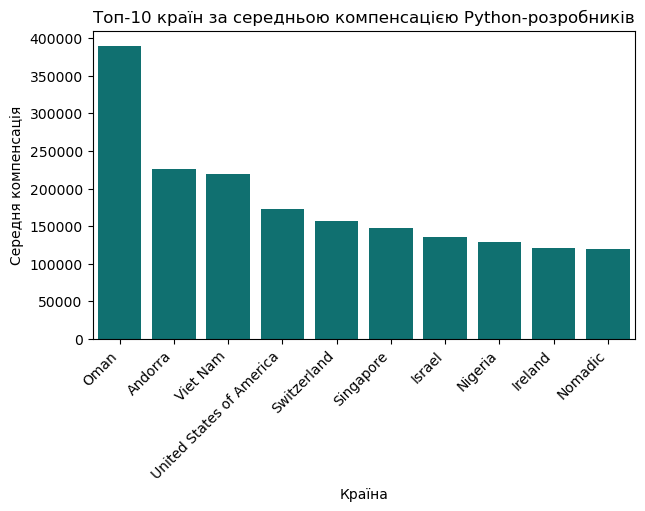

In [25]:
# Стовпчикова діаграма "Топ-10 країн за середньою компенсацією Python-розробників"
comp_col = "ConvertedCompYearly"
lang_col = "LanguageHaveWorkedWith"

# Відбираємо Python-розробників
df_py = df[df[lang_col].str.contains(r'\bPython\b', case=False, na=False)]
df_py_comp = df_py.dropna(subset=[comp_col])

# Групуємо по країнах та обчислюємо середню компенсацію
country_avg = df_py_comp.groupby("Country")[comp_col].mean().reset_index()

#  топ-10 країн
top10_countries = country_avg.sort_values(by=comp_col, ascending=False).head(10)

# Будуємо графік
plt.figure(figsize=(7,4))
sns.barplot(x="Country", y=comp_col, data=top10_countries,color='teal' )
plt.title("Топ-10 країн за середньою компенсацією Python-розробників")
plt.ylabel("Середня компенсація")
plt.xlabel("Країна")
plt.xticks(rotation=45, ha='right')
plt.show()


Завдання 8. Аналіз освіти найбільш оплачуваних спеціалістів

In [26]:
# Пошук колонок, де хоча б один рядок містить 'university' 
for col in df.columns:
    if df[col].astype(str).str.lower().str.contains('university').any():
        print(col)

EdLevel
LearnCode
AILearnHow
PlatformHaveEntry
PlatformWantEntry
AIExplain
AIOpen


In [27]:
df['EdLevel'].head(10)

0      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
1                  Associate degree (A.A., A.S., etc.)
2         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
3         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
4      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
5      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
6    Some college/university study without earning ...
7       Professional degree (JD, MD, Ph.D, Ed.D, etc.)
8         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
9      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
Name: EdLevel, dtype: object

In [28]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Other (please specify):', 'Primary/elementary school', nan],
      dtype=object)

In [29]:
df_comp = df.dropna(subset=['ConvertedCompYearly']).copy()
df_comp['ConvertedCompYearly'] = pd.to_numeric(df_comp['ConvertedCompYearly'], errors='coerce')

top5 = df_comp.sort_values('ConvertedCompYearly', ascending=False).head(5)

print("Аналіз освіти найбільш оплачуваних спеціалістів:")
print(top5[['EdLevel', 'ConvertedCompYearly']].reset_index(drop=True))

Аналіз освіти найбільш оплачуваних спеціалістів:
                                           EdLevel  ConvertedCompYearly
0              Associate degree (A.A., A.S., etc.)           50000000.0
1  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)           33552715.0
2              Associate degree (A.A., A.S., etc.)           18387548.0
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           15430267.0
4  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)           13921760.0


Завдання 9. Аналіз популярності Python по віковим категоріям

In [30]:
[col for col in df.columns if 'age' in col.lower()]

['Age',
 'LanguageChoice',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'LanguagesHaveEntry',
 'LanguagesWantEntry',
 'AIAgents',
 'AIAgentChange',
 'AIAgent_Uses',
 'AgentUsesGeneral',
 'AIAgentImpactSomewhat agree',
 'AIAgentImpactNeutral',
 'AIAgentImpactSomewhat disagree',
 'AIAgentImpactStrongly agree',
 'AIAgentImpactStrongly disagree',
 'AIAgentChallengesNeutral',
 'AIAgentChallengesSomewhat disagree',
 'AIAgentChallengesStrongly agree',
 'AIAgentChallengesSomewhat agree',
 'AIAgentChallengesStrongly disagree',
 'AIAgentKnowledge',
 'AIAgentKnowWrite',
 'AIAgentOrchestration',
 'AIAgentOrchWrite',
 'AIAgentObserveSecure',
 'AIAgentObsWrite',
 'AIAgentExternal',
 'AIAgentExtWrite']

In [31]:
df['Age'].head(10)

0    25-34 years old
1    25-34 years old
2    35-44 years old
3    35-44 years old
4    35-44 years old
5    45-54 years old
6    25-34 years old
7    35-44 years old
8    25-34 years old
9    25-34 years old
Name: Age, dtype: object

In [32]:
age_col = "Age"
lang_col = "LanguageHaveWorkedWith"
df_age = df.dropna(subset=[age_col, lang_col]).copy()

df_age[lang_col] = df_age[lang_col].astype(str)
df_age['UsesPython'] = df_age[lang_col].str.contains(r'\bPython\b', case=False)

grouped = df_age.groupby(age_col).agg(
    total_respondents=('UsesPython', 'count'),
    python_users=('UsesPython', 'sum')
).reset_index()

grouped['percent_python'] = (grouped['python_users'] / grouped['total_respondents'] * 100).round(2)

print("Відсоток респондентів, які програмують на Python серед різних вікових груп:")
print(grouped[[age_col, 'percent_python']])

Відсоток респондентів, які програмують на Python серед різних вікових груп:
                 Age  percent_python
0    18-24 years old           71.75
1    25-34 years old           59.30
2    35-44 years old           54.09
3    45-54 years old           53.83
4    55-64 years old           49.14
5  65 years or older           43.51
6  Prefer not to say           66.48


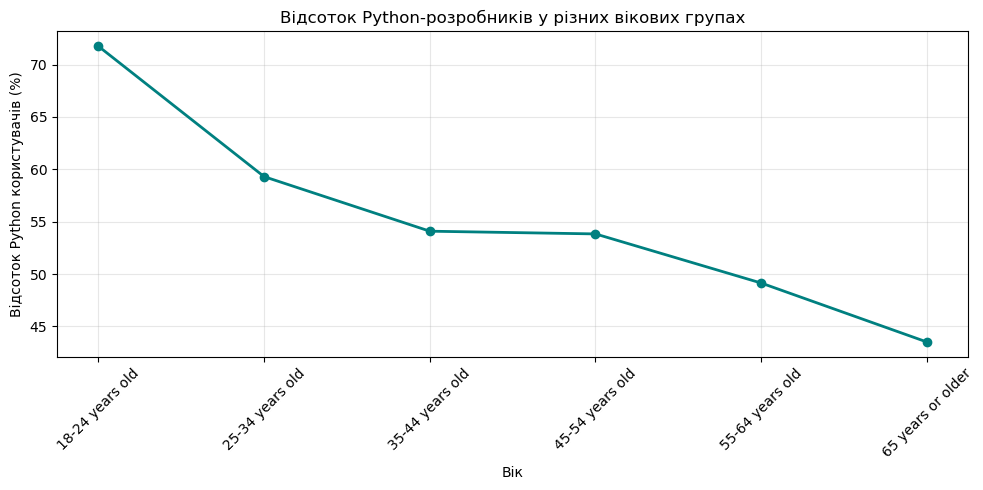

In [33]:
grouped_clean = grouped[grouped[age_col] != "Prefer not to say"]

# Лінійний графік
plt.figure(figsize=(10, 5))
plt.plot(
    grouped_clean[age_col],
    grouped_clean['percent_python'],
    marker='o',
    linewidth=2,
    color='teal'
)


plt.title("Відсоток Python-розробників у різних вікових групах")
plt.xlabel("Вік")
plt.ylabel("Відсоток Python користувачів (%)")

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Завдання 10. Аналіз індустрій серед високооплачуваних віддалених працівників

In [34]:
comp_col = "ConvertedCompYearly"
remote_col = "RemoteWork"
industry_col = "Industry"

#  75-й перцентиль
p75 = df[comp_col].quantile(0.75)

#  Фільтруємо високооплачуваних віддалених працівників
high_paid_remote = df[
    (df[comp_col] > p75) &
    (df[remote_col].str.contains("Remote", case=False, na=False))
].copy()   

#  Заповнюємо пропуски порожнім рядком і розбиваємо на списки
high_paid_remote[industry_col] = high_paid_remote[industry_col].fillna('')
high_paid_remote[industry_col] = high_paid_remote[industry_col].str.split(r';|,')

#  Розпаковуємо списки в окремі рядки
industries_exploded = high_paid_remote.explode(industry_col).copy()

#  Чистимо порожні значення і пробіли
industries_exploded[industry_col] = industries_exploded[industry_col].str.strip()
industries_exploded = industries_exploded[industries_exploded[industry_col] != ""]

#  Підрахунок кількості по індустріях
industry_counts = industries_exploded[industry_col].value_counts().reset_index()
industry_counts.columns = ["Industry", "Count"]

print("Кількість високооплачуваних респондентів,що працюють віддалено, в розрізі галузей :")
print(industry_counts)

Кількість високооплачуваних респондентів,що працюють віддалено, в розрізі галузей :
                                Industry  Count
0                   Software Development   1503
1                                 Other:    267
2                                Fintech    255
3                             Healthcare    236
4                               Internet    192
5       Telecomm or Information Services    192
6             Banking/Financial Services    156
7                             Government    118
8           Media & Advertising Services     97
9           Retail and Consumer Services     95
10  Computer Systems Design and Services     92
11                       or Supply Chain     88
12                        Transportation     88
13                         Manufacturing     81
14                                Energy     71
15                             Insurance     64
16                      Higher Education     48


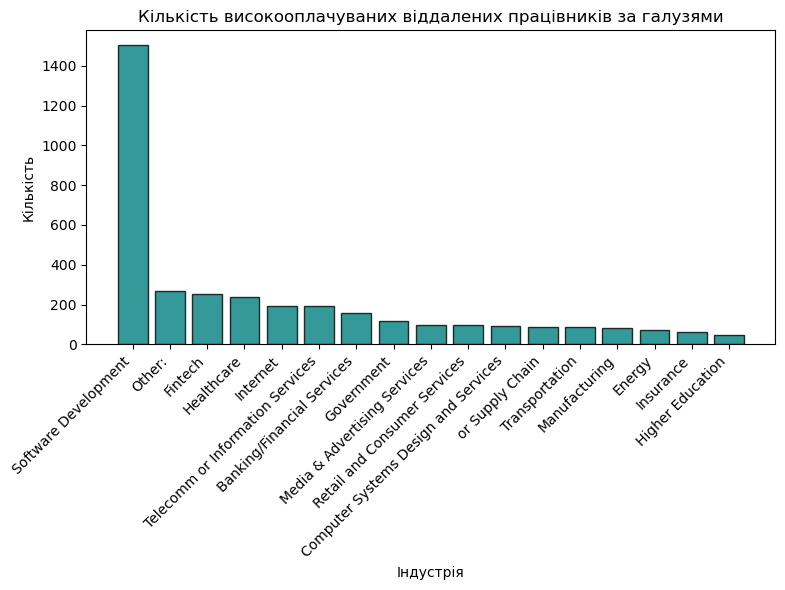

In [35]:
# Стовпчикова  діаграма "Кількість високооплачуваних віддалених працівників за галузями"

# Сортуємо за кількістю 
industry_counts_sorted = industry_counts.sort_values(by="Count", ascending=False)

# Побудова стовпчикової  діаграми
plt.figure(figsize=(8, 6))
plt.bar(
    industry_counts_sorted["Industry"],
    industry_counts_sorted["Count"],
    color="teal",
    edgecolor="black",
    alpha=0.8
)

plt.xlabel("Індустрія")
plt.ylabel("Кількість")
plt.title("Кількість високооплачуваних віддалених працівників за галузями")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Згідно з проведеним аналізом виявлено:
Загальна кількість опитаних респондентів: 49 191.
Кількість запитань: 139; повністю на всі запитання не відповів жоден респондент.
Досвід роботи: коливається від 1 до 100 років (є окремі викиди у цій колонці).
Формат роботи: кількість офлайн (офісних) працівників дещо вища порівняно з віддаленими.
Використання Python: серед усіх опитаних респондентів 37,54% програмують на Python. Аналіз вікових груп серед Python-розробників показав, що найчастіше цією мовою користуються наймолодші респонденти (18–24 роки), тоді як старші програмісти (старші 55 років) використовують її дуже рідко.
Освіта та зарплата: спеціалісти з магістерським ступенем в середньому заробляють у 3–5 разів більше, ніж ті, хто має бакалаврський ступінь; магістратура є найсильнішим фактором високої зарплати.
Сектор зайнятості: найбільше високооплачуваних віддалених працівників зосереджено в галузі Software Development, яка значно випереджає інші сектори. На другому-третьому місці — Fintech та Healthcare.
